In [ ]:
%pip install -r seggpt/requirements.txt
%pip install -q autodistill roboflow supervision pycocotools

In [1]:
from roboflow import login,Roboflow

login()
rf = Roboflow()

project = rf.workspace("roboflow-4rfmv").project("climbing-y56wy")
dataset = project.version(5).download("coco-segmentation")

You are already logged into Roboflow. To make a different login, run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Climbing-5 in coco-segmentation:: 100%|██████████| 51/51 [00:00<00:00, 3176.98it/s]


In [2]:
import supervision as sv

climbing_dataset = sv.DetectionDataset.from_coco(
    images_directory_path="Climbing-5/train",
    annotations_path="Climbing-5/train/_annotations.coco.json",
    force_masks=True
)

In [3]:
from autodistill_seggpt.seggpt import FewShotOntology,SegGPT


# Give some reference labelled images for each class.
# Here, I give 2 example images per class.
few_shot_ontology = [
    (("2-floor",[
        "AF1QipPBzeDDJrkRNarWKXj14aPvvfBagdQp2zrTrEmr-s773-k-no_jpeg.rf.82ee9609eafae21d00962e5a8a20c20f.jpg",
        "AF1QipPPoiOGV-KFbtwhkGve4WZLVFstDdx2Z53q-lOB-s1024_jpeg.rf.f124a75329d8f3061f7091cdba77f29b.jpg"
        ]), "floor"),
    (("1-climbing-holds",[
        "1_png.rf.8699b0f8ae17c02c678c2732a96667d7.jpg",
        "AF1QipMWEnam7zGb-HsVjoiH1ei4-z2aXbTf2uqHw1na-s812-k-no_jpeg.rf.4c832adeb2b0f76811d1310e20c0c2b8.jpg",
        ]), "climbing-holds"),
    (("3-person",[
        "AF1QipOVoWEyyfXcSwTOVWvoV4gqyQBtvVRMpHYJua3D-w406-h721-k-no_jpeg.rf.8ee53a6bc6691fb89e2c10860cf1614e.jpg",
        "AF1QipMn-QQ3psltJ93s2gssa85h1T2ROAacjc55e8xw-s1536_jpeg.rf.f1d9d9bb0c0f250270652600108f2d03.jpg"
        ]), "person"),
]

few_shot_ontology = FewShotOntology(
    ref_dataset=climbing_dataset,
    ontology=few_shot_ontology
)

model = SegGPT(
    ontology=few_shot_ontology,
)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Model loaded.


In [4]:
demo_img = "Climbing-5/valid/AF1QipPELU8SBYp46tI_MeyEaIEWqYYQokSmJHBLgUuy-s1024_jpeg.rf.deb882dc76686fa35048f0724332e0a9.jpg"
detections = model.predict(demo_img)


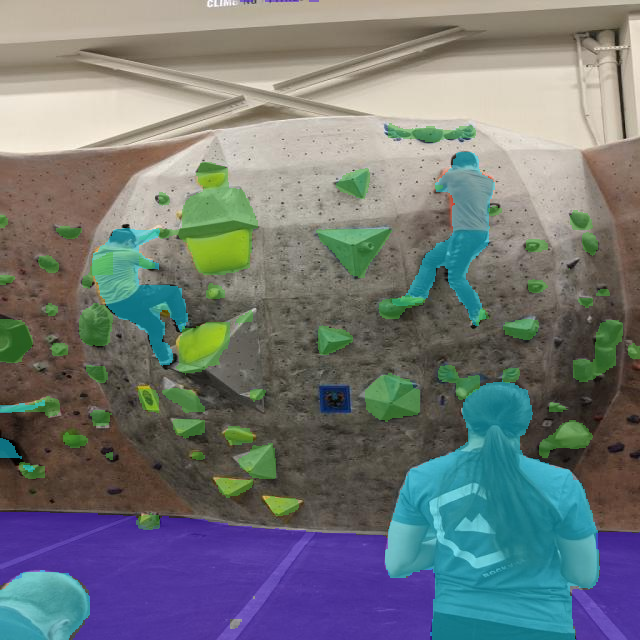

In [5]:
import cv2
from PIL import Image

annotator = sv.MaskAnnotator()
img = cv2.imread(demo_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

annotated_frame = annotator.annotate(
    scene=img.copy(),
    detections=detections
)
Image.fromarray(annotated_frame)